Examples for Rick on wave packet / vortex dynamics in his model
--------
The goal of this notebook is to examine interactions of wave packets and vortices in the case of a doubly periodic infinite (in reality finite) domain. 

Specifically, we are looking for any interesting scenarios that may arise. 

Below I will catologue this. The equations of motion are available in Rick's notes. 

The logical way to proceed would be to corroborate the infinite domain scenario, and proceed from there. 

Here, the equations of motion are:

$$\dot{\bf{x}}_p=\frac{1}{2}\sqrt{\frac{g}{|\bf{k}_p|}}\frac{\bf{k}_p}{|\bf{k}_p|}+\bf{U}_m (\bf{x}_p),$$

$$\dot{\bf{k}}_p=-k_p\boldsymbol{\nabla}U_m(\bf{x}_p)-l_p \boldsymbol{\nabla}V_m(\bf{x}_p),$$

$$\dot{\bf{x}}_i=\bf{U}_m(\bf{x}_i)+\bf{U}_d(\bf{x}_i),$$

where 

$$ \bf{U}_m(\bf{x})=\frac{1}{2\pi}\sum_i \Gamma_i \frac{(y_i-y,x-x_i)}{|\bf{x}_i-\bf{x}|^2}, $$

$$\bf{U}_d(\bf{x})=\left(-\frac{\partial \psi_d (\bf{x},\bf{x}_p,\bf{k}_p)}{\partial y},\frac{\partial \psi_d(\bf{x},\bf{x}_p,\bf{k}_p)}{\partial x} \right), $$

with

$$ \psi_d(\bf{x},\bf{x}_p,\bf{k}_p)=\sum_p \frac{A_p}{2\pi H_0}\frac{(\bf{x}-\bf{x}_p)\times \bf{k}_p}{|\bf{x}-\bf{x}_p|^2}\cdot \hat{\bf{z}}.$$

Here, $p$ is a label on the wave packets, and $i$ is a label on the vortices. As Rick remarks, the first two equations are to be expected from geometrical optics, and the third comes from the advection of the vortices, with the additional interaction term from the presence of the dipoles (ie the wave packets). 

These equations conserve momentum, and the Hamiltonian. They also should conserve something that resembles the angular momentum of the system.

These are given by

$$ H = \sum_m \mathcal{A}_p \sqrt{g|\bf{k}_p|} - \frac{H_0}{2\pi}\sum_i\sum_{j>i} \Gamma_i \Gamma_j \ln |\bf{x}_i-\bf{x}_j| - \frac{1}{2\pi} \sum_i \sum_p \Gamma_i\mathcal{A}_p \frac{(\bf{x}_i-\bf{x}_p)\times \bf{k}_p}{|\bf{x}_i-\bf{x}_p|^2}, $$
while 
$$M = \sum_p \mathcal{A}_p \bf{k}_p+\sum \Gamma_i (y_i,-x_i).$$


We implement this in MATLAB. We will start with a classic RK4 scheme, but it is simple to change this if the integrations prove to be stiff. 

In [148]:
cd /Users/npizzo/Documents/Research/Wave_vortex
N = 1;
M = 1;
% See theory notes for these values of Lo,Ho
Lo=0.5*(-3+2*sqrt(2));
Ho=(1+2*Lo)/(-1+2*Lo); 
a=sqrt((Lo-1/2*1^2)/(Ho-sqrt(1)));
% Start with 1 wave, 1 vortex. 
init=zeros(4*M+2*N,1);
init(1,1) = 0;
init(2,1) = -1+a;
init(3,1) = 1;
init(4,1) = 0;
init(5,1) = 0;
init(6,1) = -1;
A=2*pi; 
G= 2*pi;
g = 1;
options = odeset('RelTol',1e-8,'AbsTol',1e-8);
[T,Y] = ode45(@(t,y)WMVN( t, y, N, M, G, A, g), [0:.1:100], init, options);
% Y(15,2)

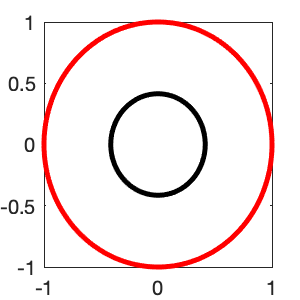

In [149]:
% view data 
imatlab_export_fig('print-png') 
clf 
plot( Y(:,1:M), Y(:,M+[1:M]), 'k.');
hold on
plot( Y(:,4*M+[1:N]), Y(:,4*M+N+[1:N]),'r.');
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 150, 150])

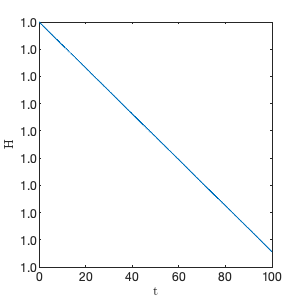

In [150]:
% check hamiltonian conservation 
H=zeros(length(T),1);
for j=1:length(T)  
    s=0;     S1=0;    L=0;
    for k=1:length(G)  
    for p=1:length(A)
     s=s+...
    (A(p)*G(k)/2/pi*...
    ((Y(j,p)-Y(j,4*M+k))*Y(j,3*M+p)-...
    (Y(j,M+p)-Y(j,4*M+N+k))*Y(j,2*M+p)))/...
    ((Y(j,p)-Y(j,4*M+k)).^2+...
    (Y(j,p+M)-Y(j,4*M+N+k)).^2);
    end
    end
    for p=1:length(A)
    S1=S1+(A(p).*sqrt(g*...
    sqrt(Y(j,2*M+p).^2+Y(j,3*M+p).^2)));
    end
    for k=1:length(G)
    if numel(G)>1
    for l=k+1:length(G)
      L=L+G(k)*G(l)*log(((Y(j,4*M+k)-Y(j,4*M+l)).^2+...
          (Y(j,4*M+N+k)-Y(j,4*M+N+l)).^2));
    end
    else
    L=0;
    end
    end
    H(j,1)=S1-1/2/pi*L+s;
end
clf
plot(T,H/H(1))
ytickformat('%.1f')
set(gca,'fontsize',6)
xlabel('t','interpreter','latex')
ylabel('H','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 150, 150])
% ylim([0 2])

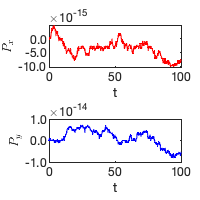

In [151]:
%% momentum
P=zeros(length(T),2);
for j=1:length(T)  
    S1=[0 0];    r=[0 0];
    for p=1:length(A)
    S1=S1+A(p).*...
    [Y(j,2*M+p),Y(j,3*M+p)];
    end
    for k=1:length(G)
      r=r+G(k)*[Y(j,4*M+N+k),-Y(j,4*M+k)];
    end
    P(j,:)=S1+r;
end
%
clf
subplot(2,1,1)
plot(T,P(:,1),'r')
ylabel('$P_x$','interpreter','latex')
xlabel('t')
ytickformat('%.1f')
set(gca,'fontsize',6)
subplot(2,1,2)
plot(T,P(:,2),'b')
ylabel('$P_y$','interpreter','latex')
xlabel('t')
ytickformat('%.1f')
set(gca,'fontsize',6)
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 100, 100])

We can also examine the stability of these scenarios, which is considered in the supplementary theory notes. This might be of potential interest for considering "trapped" wave energy. This mathematical analysis, although neat, might be a slight distraction from the larger prize, which is what happens when we increase the number of wave packets/vortices. 

In [156]:
% Extend this multiple wave packets, again following our earlier theory: 
% Case 2: 2 wave packets, 1 vortex, circular motion
M = 2;
N = 1;
r = 1/16;
chi = 1;
phi = 0;
init = [chi*cos(phi); -chi*cos(phi); ...
    chi*sin(phi); -chi*sin(phi); r*sin(phi); -r*sin(phi);...
   -r*cos(phi); r*cos(phi); 0; 0;];
A = - [1 1];
G = 2 * pi; 
g = 1;
options = odeset('RelTol',1e-8,'AbsTol',1e-8);
[T,Y] = ode45(@(t,y)WMVN( t, y, N, M, G, A, g), [0:.1:5], init, options);

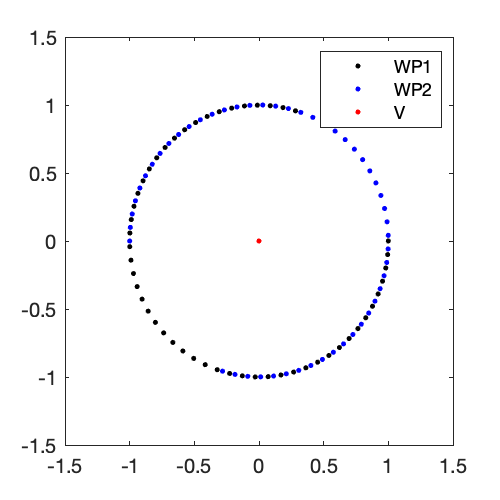

In [160]:
% view data 
imatlab_export_fig('print-png') 
clf 
plot( Y(:,1:1), Y(:,M+1), 'k.');
hold on
plot( Y(:,2), Y(:,M+2), 'b.');
hold on
plot( Y(:,4*M+[1:N]), Y(:,4*M+N+[1:N]),'r.');
legend('WP1','WP2','V')
set(gcf, 'color', 'w');
xlim([-1.5 1.5])
ylim([-1.5 1.5])
set(gcf, 'Position',  [0, 0, 250, 250])

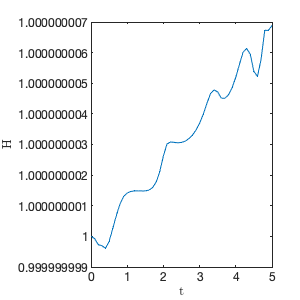

In [40]:
% check hamiltonian conservation 
H=zeros(length(T),1);
for j=1:length(T)  
    s=0;     S1=0;    L=0;
    for k=1:length(G)  
    for p=1:length(A)
     s=s+...
    (A(p)*G(k)/2/pi*...
    ((Y(j,p)-Y(j,4*M+k))*Y(j,3*M+p)-...
    (Y(j,M+p)-Y(j,4*M+N+k))*Y(j,2*M+p)))/...
    ((Y(j,p)-Y(j,4*M+k)).^2+...
    (Y(j,p+M)-Y(j,4*M+N+k)).^2);
    end
    end
    for p=1:length(A)
    S1=S1+(A(p).*sqrt(g*...
    sqrt(Y(j,2*M+p).^2+Y(j,3*M+p).^2)));
    end
    for k=1:length(G)
    if numel(G)>1
    for l=k+1:length(G)
      L=L+G(k)*G(l)*log(((Y(j,4*M+k)-Y(j,4*M+l)).^2+...
          (Y(j,4*M+N+k)-Y(j,4*M+N+l)).^2));
    end
    else
    L=0;
    end
    end
    H(j,1)=S1-1/2/pi*L+s;
end
clf
plot(T,H/H(1))
set(gca,'fontsize',6)
xlabel('t','interpreter','latex')
ylabel('H','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 150, 150])
% ylim([0 2])

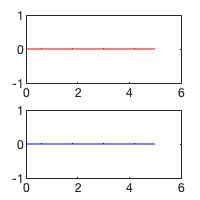

In [41]:
%% momentum
P=zeros(length(T),2);
for j=1:length(T)  
    S1=[0 0];    r=[0 0];
    for p=1:length(A)
    S1=S1+A(p).*...
    [Y(j,2*M+p),Y(j,3*M+p)];
    end
    for k=1:length(G)
      r=r+G(k)*[Y(j,4*M+N+k),-Y(j,4*M+k)];
    end
    P(j,:)=S1+r;
end
%
clf
subplot(2,1,1)
plot(T,P(:,1),'r')
set(gca,'fontsize',6)
subplot(2,1,2)
plot(T,P(:,2),'b')
set(gca,'fontsize',6)
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 100, 100])

This is nice, because it is a confirmation of the theory we developed for $M$ wave packets, and 1 vortex. Again, the physical scenario we have in mind is waves being trapped around eddies. There's likely more theory that can be developed here, besides just identifying these solutions, but again it's not clear that it's worth stopping here. 

Part 2: Doubly periodic domain
--------------------
We now generalize the above equations to be $2\pi$ periodic in both the horizontal and vertical directions. In theory, this would be infinitely periodic, but here we truncate at some numbe $L$. 

The equations of motion are written in Rick's notes. I should write them down here for completeness. We still have conservation of $H$ and $M$ (more specifically we conserve their generalized form). 

The goal is to see if interesting phyiscal scenarios arise here, particularly for long times. The integrations become more expensive (we are essentially adding a series of double sums to our evaluation of the right hand side of our differential equations, which is costly). 

Some preliminary things to check are that a system of point vortices (i.e. $ M = 0$) behaves in a way that agrees with classical studies (i.e. clustering of like signed vortices when the temperature meets a certain condition). 


In [59]:
% Case 1: 2 vortices, 2 wave packets. Equal strength. Choose a configuration where things do not start out very close 
% each other, so that we don't accidentally explore a unique part of $(H,M)$ space. 
% The initial exclusion is points within 0.25 of eachother
cd /Users/npizzo/Documents/Research/Wave_vortex
tstart=cputime;
% N = 1; 
% M = 1;
L = 3;
% 
N=2;
M=2; 
init = zeros(4*M+2*N,1);
% we can choose random initial conditions with
% the additional caveat that points aren't too close
[X, Y, ~] = GetPointsRandom(N+M, 2*pi, 2*pi, .25);
for i=1:M
init(i,1) = X(i);
init(M+i,1) = Y(i); 

end
for i=1:N
init(4*M+i,1) = X(i+M);
init(4*M+N+i,1) = Y(i+M);
end

init(2*M+1:3*M,1) = 1*ones(length(M),1);
init(3*M+1:4*M,1) = zeros(M,1);
A = 1e-1*ones(M,1); 
G = 1e-1*ones(N,1);
% G=1*( 2*rem(1:N,2) - 1);
g = 1; 
options = odeset('RelTol',1e-7,'AbsTol',1e-7);
[T,Y] = ode15s(@(t,y)WMVN_IP_2( t, y, N, M, G, A, g, L), [0:.1:1000], init, options);
tend=cputime-tstart


tend =

    1.6900



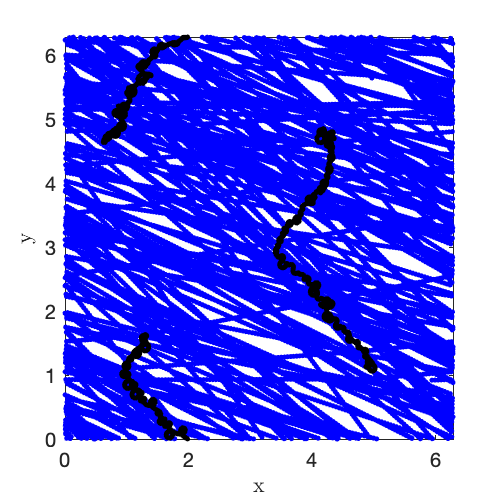

In [60]:
clf % show evolution 
% figure
plot(mod(Y(:,1:M), 2*pi), mod(Y(:,M+[1:M]), 2*pi), 'b.',...
    'markerfacecolor','b');
hold on 
plot(mod(Y(:,4*M+[1:N]), 2*pi), mod(Y(:,4*M+N+[1:N]), 2*pi),'k.',...
    'markerfacecolor','k');
xlim([0 2*pi])
ylim([0 2*pi]) 
set(gca,'fontsize',10)
xlabel('x','interpreter','latex')
ylabel('y','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

The blue points are the wave packets, the black the vortices. 

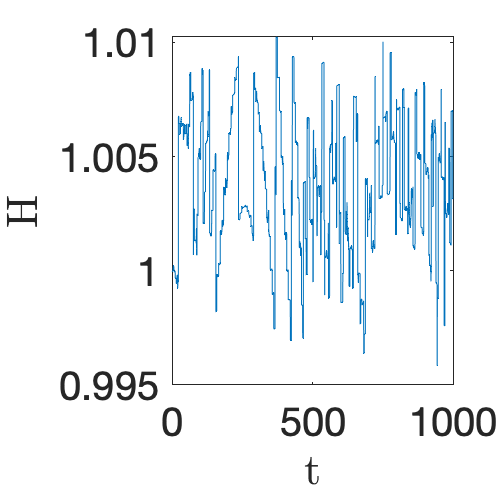

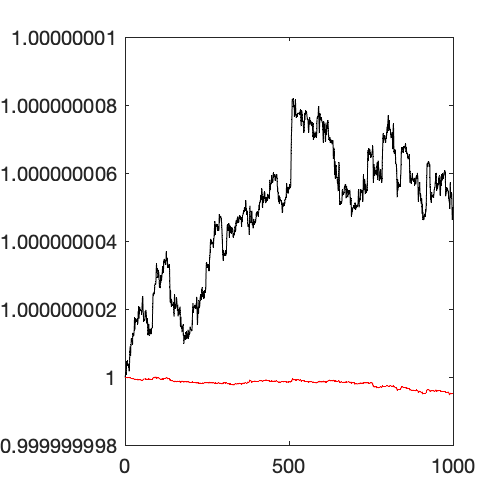

In [51]:
%% check hamiltonian conservation 
H=zeros(length(T),1);
for j=1:length(T)  
    s=0;     S1=0;    r=0;
    for k=1:length(G)  
    for p=1:length(A)
        for n=-L:L
            for m=-L:L
     s=s+...
    (A(p)*G(k)/2/pi*...
    ((mod(Y(j,p), 2*pi) - ...
    mod(Y(j,4*M+k), 2*pi)+2*pi*n)*Y(j,3*M+p)-...
    (mod(Y(j,M+p), 2*pi) -...
    mod(Y(j,4*M+N+k), 2*pi)+2*pi*m)*Y(j,2*M+p)))/...
    ((mod(Y(j,p), 2*pi)-mod(Y(j,4*M+k),2*pi)+2*pi*n).^2+...
    (mod(Y(j,p+M),2*pi)-mod(Y(j,4*M+N+k),2*pi) +2*pi*m).^2);
            end
        end
    end
    end
    for p=1:length(A)
    S1=S1+(A(p).*sqrt(g*...
    sqrt(Y(j,2*M+p).^2+Y(j,3*M+p).^2)));
    end
    for k=1:length(G)
    if numel(G)>1
    for l=k+1:length(G)
        for n=-L:L
            for m=-L:L
      r=r+G(k)*G(l)*log(((mod(Y(j,4*M+k),2*pi)-...
          mod(Y(j,4*M+l),2*pi)+2*pi*n).^2+...
          (mod(Y(j,4*M+N+k), 2*pi) - ...
          mod(Y(j,4*M+N+l),2*pi)+2*pi*m).^2));
            end
        end
    end
    else
    r=0;
    end
    end
    H(j,1)=S1-1/2/pi*r+s;
end
% clf
figure
plot(T,H/H(1))
set(gca,'fontsize',20)
xlabel('t','interpreter','latex')
ylabel('H','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])
% ylim([0 2])
%% momentum
P = zeros(length(T),2);
for j = 1:length(T)  
    S1=[0 0];    r=[0 0];
    for p=1:length(A)
    S1=S1+A(p).*...
    [Y(j,2*M+p),Y(j,3*M+p)];
    end
    for k=1:length(G)
%         for n=-L:L
%             for m=-L:L
%       r=r+G(k)*[mod(Y(j,4*M+N+k), 2*pi)+2*pi*m,...
%           -mod(Y(j,4*M+k),2*pi)+2*pi*n];
%             end
%         end
      r=r+G(k)*[Y(j,4*M+N+k), - Y(j,4*M+k)];
    end 
    P(j,:)=S1+r;
end
% clf
figure

plot(T,P(:,1)/P(1,1),'r') 
hold on
plot(T,P(:,2)/P(1,2),'k')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

In [82]:
% We now do the same thing and require the points to be more spread out
tstart=cputime;
% N = 1; 
% M = 1;
L = 3;
% 
N=2;
M=2; 
init = zeros(4*M+2*N,1);
% we can choose random initial conditions with
% the additional caveat that points aren't too close
[X, Y, ~] = GetPointsRandom(N+M, 2*pi, 2*pi, 1);
for i=1:M
init(i,1) = X(i);
init(M+i,1) = Y(i); 

end
for i=1:N
init(4*M+i,1) = X(i+M);
init(4*M+N+i,1) = Y(i+M);
end

init(2*M+1:3*M,1) = 1*ones(length(M),1);
init(3*M+1:4*M,1) = zeros(M,1);
A = 1e-1*ones(M,1); 
G = 1e-1*ones(N,1);
% G=1*( 2*rem(1:N,2) - 1);
g = 1; 
options = odeset('RelTol',1e-7,'AbsTol',1e-7);
[T,Y] = ode15s(@(t,y)WMVN_IP_2( t, y, N, M, G, A, g, L), [0:.1:1000], init, options);
tend=cputime-tstart


tend =

    1.4900



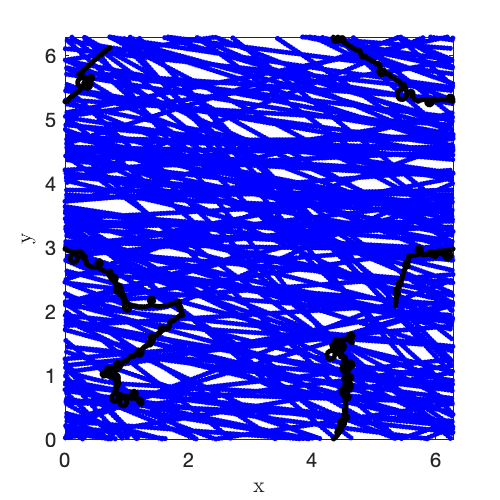

In [83]:
clf 
% figure
plot(mod(Y(:,1:M), 2*pi), mod(Y(:,M+[1:M]), 2*pi), 'b.',...
    'markerfacecolor','b');
hold on 
plot(mod(Y(:,4*M+[1:N]), 2*pi), mod(Y(:,4*M+N+[1:N]), 2*pi),'k.',...
    'markerfacecolor','k');
xlim([0 2*pi])
ylim([0 2*pi]) 
set(gca,'fontsize',10)
xlabel('x','interpreter','latex')
ylabel('y','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

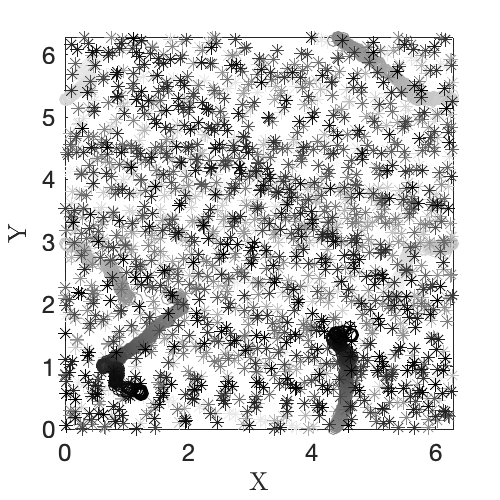

In [85]:
%% movie
clf
for i=1:10:length(T)
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'*','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'o','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
xlim([0 2*pi])
ylim([0 2*pi])
set(gca,'fontsize',12)
xlabel('X','interpreter','latex')
ylabel('Y','interpreter','latex')
pause(0.001)
end
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

At this point it will be useful to examine the wavenumber dependence found in this scenario. 

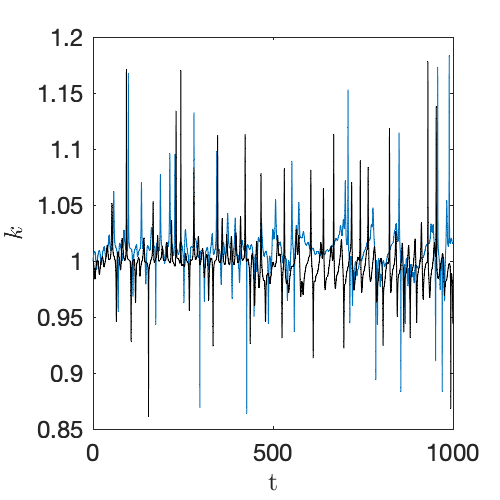

In [86]:
%% wavenumber dependence
clf
plot(T,sqrt(Y(:,2*M+1).^2+Y(:,3*M+1).^2))
hold on
plot(T,sqrt(Y(:,2*M+2).^2+Y(:,3*M+2).^2),'k')
set(gca,'fontsize',12)
xlabel('t','interpreter','latex')
ylabel('$k$','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

* We see that the wavenumber modulus does not blow up, but it is rapidly varying. 

* We can look at how H is exchanging energy between the components 

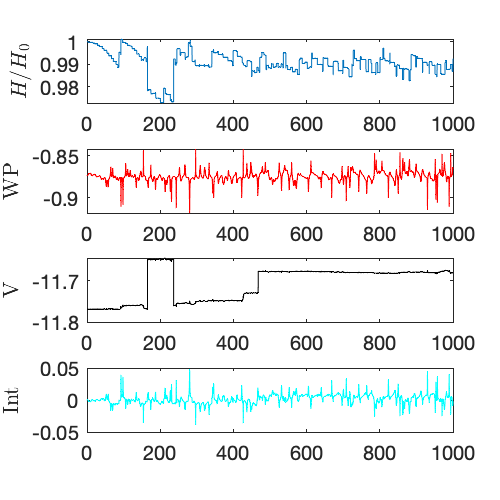

In [87]:
H=zeros(length(T),1);
S2=H; r1=H; s1=H;
for j=1:length(T)  
    s=0;     S1=0;    r=0;
    for k=1:length(G)  
    for p=1:length(A)
        for n=-L:L
            for m=-L:L
     s=s+...
    (A(p)*G(k)/2/pi*...
    ((mod(Y(j,p), 2*pi) - ...
    mod(Y(j,4*M+k), 2*pi)+2*pi*n)*Y(j,3*M+p)-...
    (mod(Y(j,M+p), 2*pi) -...
    mod(Y(j,4*M+N+k), 2*pi)+2*pi*m)*Y(j,2*M+p)))/...
    ((mod(Y(j,p), 2*pi)-mod(Y(j,4*M+k),2*pi)+2*pi*n).^2+...
    (mod(Y(j,p+M),2*pi)-mod(Y(j,4*M+N+k),2*pi) +2*pi*m).^2);
            end
        end
    end
    end
    for p=1:length(A)
    S1=S1+(A(p).*sqrt(g*...
    sqrt(Y(j,2*M+p).^2+Y(j,3*M+p).^2)));
    end
    for k=1:length(G)
    if numel(G)>1
    for l=k+1:length(G)
        for n=-L:L
            for m=-L:L
      r=r+G(k)*G(l)*log(((mod(Y(j,4*M+k),2*pi)-...
          mod(Y(j,4*M+l),2*pi)+2*pi*n).^2+...
          (mod(Y(j,4*M+N+k), 2*pi) - ...
          mod(Y(j,4*M+N+l),2*pi)+2*pi*m).^2));
            end
        end
    end
    else
    r=0;
    end
    end
    H(j,1)=S1-1/2/pi*r+s;
    S2(j,1)=S1; 
    r1(j,1)=r;
    s1(j,1)=s;
end
% clf
figure
subplot(4,1,1)
plot(T,H/H(1))
ylabel('$H/H_0$','interpreter','latex')
subplot(4,1,2)
plot(T,S2/H(1),'r')
ylabel('WP','interpreter','latex')
subplot(4,1,3)
plot(T,r1/H(1),'k')
ylabel('V','interpreter','latex')
subplot(4,1,4)
plot(T,s1/H(1),'c')
ylabel('Int','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])
set(gca,'fontsize',10)

It looks like all of the energy is in the vortices? Also, the step changes are due to the enforced periodicity of the solutions, but they seem weird here. Look into what's going on? Recompute without mod functions.  

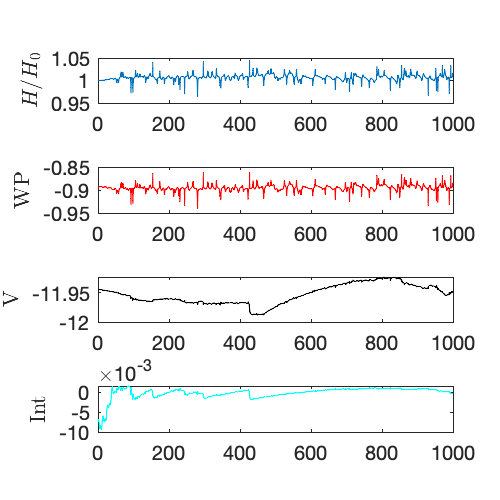

In [88]:
H=zeros(length(T),1);
S2=H; r1=H; s1=H;
for j=1:length(T)  
    s=0;     S1=0;    r=0;
    for k=1:length(G)  
    for p=1:length(A)
        for n=-L:L
            for m=-L:L
     s=s+...
    (A(p)*G(k)/2/pi*...
    ((Y(j,p) - ...
   Y(j,4*M+k)+2*pi*n)*Y(j,3*M+p)-...
    (Y(j,M+p) -...
   Y(j,4*M+N+k)+2*pi*m)*Y(j,2*M+p)))/...
    ((Y(j,p)-Y(j,4*M+k)+2*pi*n).^2+...
    (Y(j,p+M)-Y(j,4*M+N+k) +2*pi*m).^2);
            end
        end
    end
    end
    for p=1:length(A)
    S1=S1+(A(p).*sqrt(g*...
    sqrt(Y(j,2*M+p).^2+Y(j,3*M+p).^2)));
    end
    for k=1:length(G)
    if numel(G)>1
    for l=k+1:length(G)
        for n=-L:L
            for m=-L:L
      r=r+G(k)*G(l)*log(((Y(j,4*M+k)-...
          Y(j,4*M+l)+2*pi*n).^2+...
          (Y(j,4*M+N+k) - ...
         Y(j,4*M+N+l)+2*pi*m).^2));
            end
        end
    end
    else
    r=0;
    end
    end
    H(j,1)=S1-1/2/pi*r+s;
    S2(j,1)=S1; 
    r1(j,1)=r;
    s1(j,1)=s;
end
% clf
figure
subplot(4,1,1)
plot(T,H/H(1))
ylabel('$H/H_0$','interpreter','latex')
subplot(4,1,2)
plot(T,S2/H(1),'r')
ylabel('WP','interpreter','latex')
subplot(4,1,3)
plot(T,r1/H(1),'k')
ylabel('V','interpreter','latex')
subplot(4,1,4)
plot(T,s1/H(1),'c')
ylabel('Int','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])
set(gca,'fontsize',10)

This actualyl does worse. Okay. The interactions are weak, and the vortex energy dominates that in the WP. Let's try to do this where they're on more equal footing. 

In [89]:
% Try to make the energy in the vortices and wave packets comparable 
tstart=cputime;
% N = 1; 
% M = 1;
L = 3;
% 
N=2;
M=2; 
init = zeros(4*M+2*N,1);
% we can choose random initial conditions with
% the additional caveat that points aren't too close
[X, Y, ~] = GetPointsRandom(N+M, 2*pi, 2*pi, 1);
for i=1:M
init(i,1) = X(i);
init(M+i,1) = Y(i); 

end
for i=1:N
init(4*M+i,1) = X(i+M);
init(4*M+N+i,1) = Y(i+M);
end

init(2*M+1:3*M,1) = 1*ones(length(M),1);
init(3*M+1:4*M,1) = zeros(M,1);
A = 1*ones(M,1); 
G = 1e-1*ones(N,1);
% G=1*( 2*rem(1:N,2) - 1);
g = 1; 
options = odeset('RelTol',1e-7,'AbsTol',1e-7);
[T,Y] = ode15s(@(t,y)WMVN_IP_2( t, y, N, M, G, A, g, L), [0:.1:1000], init, options);
tend=cputime-tstart

> In ode15s (line 655)

tend =

    1.2600



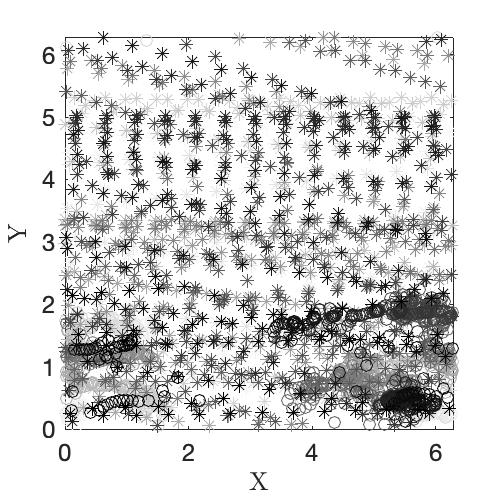

In [90]:
clf
for i=1:10:length(T)
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'*','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'o','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
xlim([0 2*pi])
ylim([0 2*pi])
set(gca,'fontsize',12)
xlabel('X','interpreter','latex')
ylabel('Y','interpreter','latex')
end
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

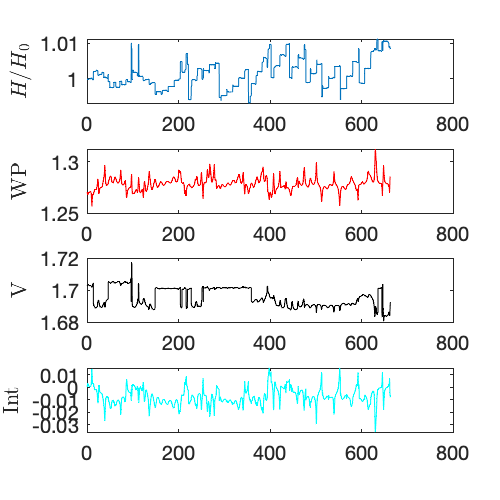

In [91]:
H=zeros(length(T),1);
S2=H; r1=H; s1=H;
for j=1:length(T)  
    s=0;     S1=0;    r=0;
    for k=1:length(G)  
    for p=1:length(A)
        for n=-L:L
            for m=-L:L
     s=s+...
    (A(p)*G(k)/2/pi*...
    ((mod(Y(j,p), 2*pi) - ...
    mod(Y(j,4*M+k), 2*pi)+2*pi*n)*Y(j,3*M+p)-...
    (mod(Y(j,M+p), 2*pi) -...
    mod(Y(j,4*M+N+k), 2*pi)+2*pi*m)*Y(j,2*M+p)))/...
    ((mod(Y(j,p), 2*pi)-mod(Y(j,4*M+k),2*pi)+2*pi*n).^2+...
    (mod(Y(j,p+M),2*pi)-mod(Y(j,4*M+N+k),2*pi) +2*pi*m).^2);
            end
        end
    end
    end
    for p=1:length(A)
    S1=S1+(A(p).*sqrt(g*...
    sqrt(Y(j,2*M+p).^2+Y(j,3*M+p).^2)));
    end
    for k=1:length(G)
    if numel(G)>1
    for l=k+1:length(G)
        for n=-L:L
            for m=-L:L
      r=r+G(k)*G(l)*log(((mod(Y(j,4*M+k),2*pi)-...
          mod(Y(j,4*M+l),2*pi)+2*pi*n).^2+...
          (mod(Y(j,4*M+N+k), 2*pi) - ...
          mod(Y(j,4*M+N+l),2*pi)+2*pi*m).^2));
            end
        end
    end
    else
    r=0;
    end
    end
    H(j,1)=S1-1/2/pi*r+s;
    S2(j,1)=S1; 
    r1(j,1)=r;
    s1(j,1)=s;
end
% clf
figure
subplot(4,1,1)
plot(T,H/H(1))
ylabel('$H/H_0$','interpreter','latex')
subplot(4,1,2)
plot(T,S2/H(1),'r')
ylabel('WP','interpreter','latex')
subplot(4,1,3)
plot(T,r1/H(1),'k')
ylabel('V','interpreter','latex')
subplot(4,1,4)
plot(T,s1/H(1),'c')
ylabel('Int','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])
set(gca,'fontsize',10)

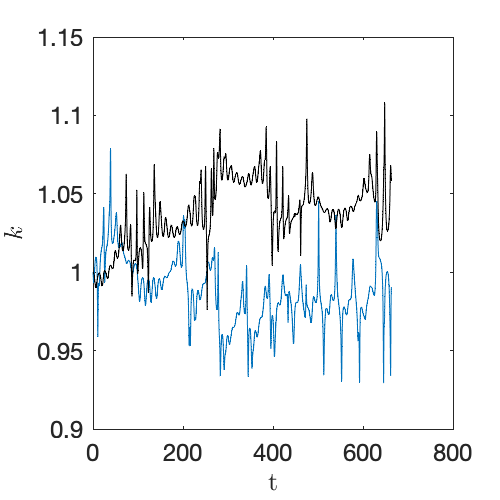

In [92]:
%% wavenumber dependence
clf
plot(T,sqrt(Y(:,2*M+1).^2+Y(:,3*M+1).^2))
hold on
plot(T,sqrt(Y(:,2*M+2).^2+Y(:,3*M+2).^2),'k')
set(gca,'fontsize',12)
xlabel('t','interpreter','latex')
ylabel('$k$','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

So what exactly is "blowing up" here? To figure this out, let's take a closer look at the WP and V trajectories near the end of the simulation

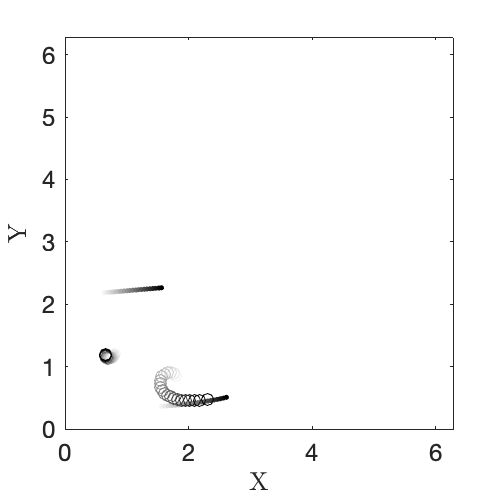

In [105]:
clf
j=0;
for i=length(T)-20:length(T)
j=j+1;
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'.','Color',...
    [1-j/21,1-j/21,1-j/21]);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'o','Color',...
    [1-j/21,1-j/21,1-j/21]);
    hold on
xlim([0 2*pi])
ylim([0 2*pi])
set(gca,'fontsize',12)
xlabel('X','interpreter','latex')
ylabel('Y','interpreter','latex')
end
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

 It seems like the vortex approach the WP is enough to stop the run. What happens to $k$ here? Note, it's the first wave packet.  

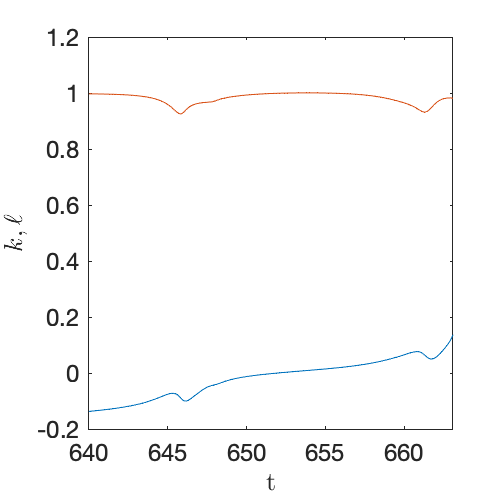

In [117]:
plot(T,Y(:,3*M+1))
hold on
plot(T,Y(:,2*M+1))
set(gca,'fontsize',12)
xlabel('t','interpreter','latex')
ylabel('$k,\ell$','interpreter','latex')
xlim([640 max(T)])
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

It seems like it's really this rapid growth of $l$ that leads to the issues. 

In [118]:
% Let's put most of the energy in the wave packets 
tstart=cputime;
% N = 1; 
% M = 1;
L = 3;
% 
N=2;
M=2; 
init = zeros(4*M+2*N,1);
% we can choose random initial conditions with
% the additional caveat that points aren't too close
[X, Y, ~] = GetPointsRandom(N+M, 2*pi, 2*pi, 1);
for i=1:M
init(i,1) = X(i);
init(M+i,1) = Y(i); 

end
for i=1:N
init(4*M+i,1) = X(i+M);
init(4*M+N+i,1) = Y(i+M);
end

init(2*M+1:3*M,1) = 1*ones(length(M),1);
init(3*M+1:4*M,1) = zeros(M,1);
A = 1*ones(M,1); 
G = 1e-3*ones(N,1);
% G=1*( 2*rem(1:N,2) - 1);
g = 1; 
options = odeset('RelTol',1e-7,'AbsTol',1e-7);
[T,Y] = ode15s(@(t,y)WMVN_IP_2( t, y, N, M, G, A, g, L), [0:.1:1000], init, options);
tend=cputime-tstart

> In ode15s (line 717)

tend =

    1.1300



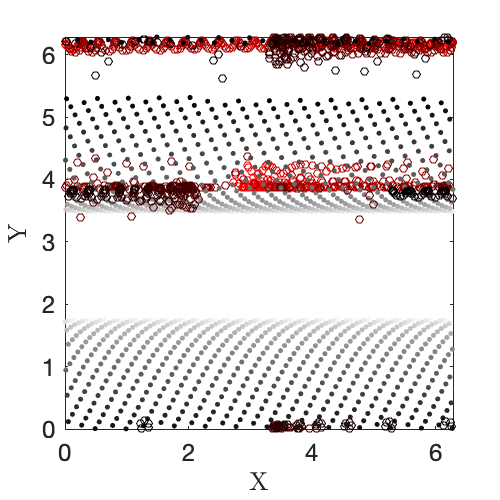

In [123]:
clf
for i=1:10:length(T)
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'.','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'o','Color',...
    [1-i/numel(T),0,0],'markersize',4);
end
xlim([0 2*pi])
ylim([0 2*pi])
set(gca,'fontsize',12)
xlabel('X','interpreter','latex')
ylabel('Y','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

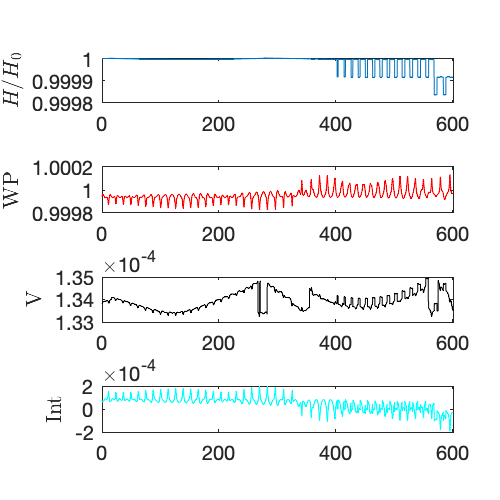

In [124]:
H=zeros(length(T),1);
S2=H; r1=H; s1=H;
for j=1:length(T)  
    s=0;     S1=0;    r=0;
    for k=1:length(G)  
    for p=1:length(A)
        for n=-L:L
            for m=-L:L
     s=s+...
    (A(p)*G(k)/2/pi*...
    ((mod(Y(j,p), 2*pi) - ...
    mod(Y(j,4*M+k), 2*pi)+2*pi*n)*Y(j,3*M+p)-...
    (mod(Y(j,M+p), 2*pi) -...
    mod(Y(j,4*M+N+k), 2*pi)+2*pi*m)*Y(j,2*M+p)))/...
    ((mod(Y(j,p), 2*pi)-mod(Y(j,4*M+k),2*pi)+2*pi*n).^2+...
    (mod(Y(j,p+M),2*pi)-mod(Y(j,4*M+N+k),2*pi) +2*pi*m).^2);
            end
        end
    end
    end
    for p=1:length(A)
    S1=S1+(A(p).*sqrt(g*...
    sqrt(Y(j,2*M+p).^2+Y(j,3*M+p).^2)));
    end
    for k=1:length(G)
    if numel(G)>1
    for l=k+1:length(G)
        for n=-L:L
            for m=-L:L
      r=r+G(k)*G(l)*log(((mod(Y(j,4*M+k),2*pi)-...
          mod(Y(j,4*M+l),2*pi)+2*pi*n).^2+...
          (mod(Y(j,4*M+N+k), 2*pi) - ...
          mod(Y(j,4*M+N+l),2*pi)+2*pi*m).^2));
            end
        end
    end
    else
    r=0;
    end
    end
    H(j,1)=S1-1/2/pi*r+s;
    S2(j,1)=S1; 
    r1(j,1)=r;
    s1(j,1)=s;
end
% clf
figure
subplot(4,1,1)
plot(T,H/H(1))
ylabel('$H/H_0$','interpreter','latex')
subplot(4,1,2)
plot(T,S2/H(1),'r')
ylabel('WP','interpreter','latex')
subplot(4,1,3)
plot(T,r1/H(1),'k')
ylabel('V','interpreter','latex')
subplot(4,1,4)
plot(T,s1/H(1),'c')
ylabel('Int','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])
set(gca,'fontsize',10)

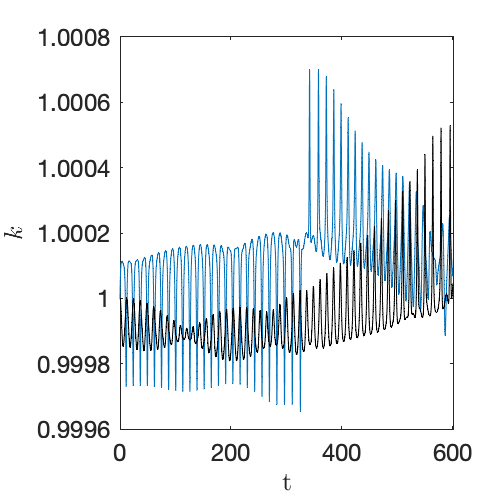

In [125]:
plot(T,sqrt(Y(:,2*M+1).^2+Y(:,3*M+1).^2))
hold on
plot(T,sqrt(Y(:,2*M+2).^2+Y(:,3*M+2).^2),'k')
set(gca,'fontsize',12)
xlabel('t','interpreter','latex')
ylabel('$k$','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

In [138]:
% If the vortex energy goes to 0, do we still have this blow up? 
tstart=cputime;
% N = 1; 
% M = 1;
L = 3;
% 
N=2;
M=2; 
init = zeros(4*M+2*N,1);
% we can choose random initial conditions with
% the additional caveat that points aren't too close
[X, Y, ~] = GetPointsRandom(N+M, 2*pi, 2*pi, 2);
for i=1:M
init(i,1) = X(i);
init(M+i,1) = Y(i); 

end
for i=1:N
init(4*M+i,1) = X(i+M);
init(4*M+N+i,1) = Y(i+M);
end

init(2*M+1:3*M,1) = 1/2*ones(length(M),1);
init(3*M+1:4*M,1) = 1/2*ones(length(M),1);
A = 1*ones(M,1); 
G = 1e-5*ones(N,1);
g = 1; 
options = odeset('RelTol',1e-7,'AbsTol',1e-7);
[T,Y] = ode15s(@(t,y)WMVN_IP_2( t, y, N, M, G, A, g, L), [0:.1:1000], init, options);
tend=cputime-tstart


tend =

    1.1200



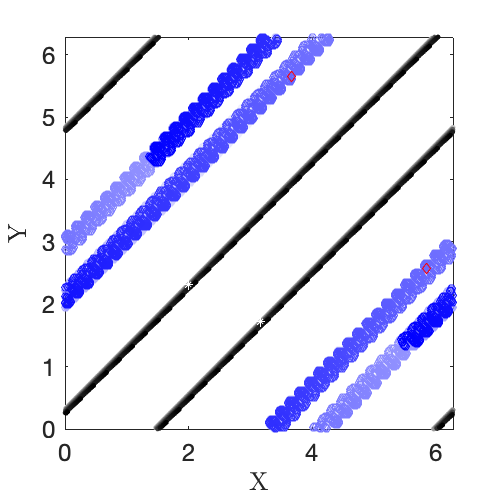

In [139]:
clf
for i=1:5:length(T)
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'.','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'o','Color',...
    [1-i/numel(T),1-i/numel(T),1],'markersize',4);
end
hold on
i=1;
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'*','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markersize',4);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'d','Color',...
    [1-i/numel(T),0,0],'markersize',4);
xlim([0 2*pi])
ylim([0 2*pi])
set(gca,'fontsize',12)
xlabel('X','interpreter','latex')
ylabel('Y','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

Something interesting that I've noticed is that weak vortices tend to align themselves with a propagation axis that is parralel to the waves. This motion has these inertial like epicycles superposed on top. Connection with LC? Note, these solutions do not seem to lead to blow up. 

It's likely worth seeing if something like this is generically true, so let's increase the number of vortices/ waves to see what happens. 

In [161]:
% Same as example above, switch signs of vortices so they are a dipole 
tstart=cputime;
% N = 1; 
% M = 1;
L = 3;
% 
N=2;
M=2; 
init = zeros(4*M+2*N,1);
% we can choose random initial conditions with
% the additional caveat that points aren't too close
[X, Y, ~] = GetPointsRandom(N+M, 2*pi, 2*pi, 2);
for i=1:M
init(i,1) = X(i);
init(M+i,1) = Y(i); 

end
for i=1:N
init(4*M+i,1) = X(i+M);
init(4*M+N+i,1) = Y(i+M);
end

init(2*M+1:3*M,1) = 1/2*ones(length(M),1);
init(3*M+1:4*M,1) = 1/2*ones(length(M),1);
A = 1*ones(M,1); 
G = 1e-5*( 2*rem(1:N,2) - 1);
g = 1; 
options = odeset('RelTol',1e-7,'AbsTol',1e-7);
[T,Y] = ode15s(@(t,y)WMVN_IP_2( t, y, N, M, G, A, g, L), [0:.1:1000], init, options);
tend=cputime-tstart


tend =

    5.2800



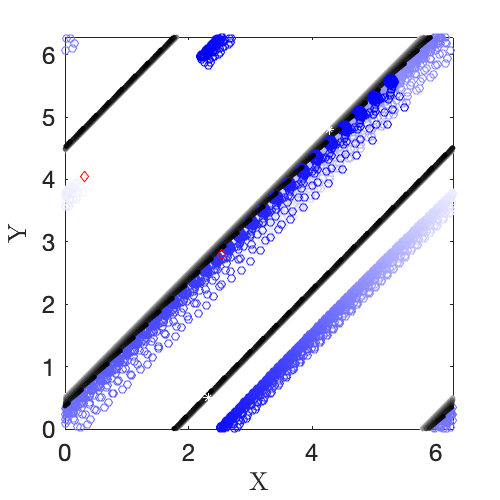

In [162]:
clf
for i=1:5:length(T)
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'.','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'o','Color',...
    [1-i/numel(T),1-i/numel(T),1],'markersize',4);
end
hold on
i=1;
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'*','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markersize',4);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'d','Color',...
    [1-i/numel(T),0,0],'markersize',4);
xlim([0 2*pi])
ylim([0 2*pi])
set(gca,'fontsize',12)
xlabel('X','interpreter','latex')
ylabel('Y','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

The vortices seem to be coupled to the wave packets again. 

In [163]:
% Next, let l0=0;
tstart=cputime;
% N = 1; 
% M = 1;
L = 3;
% 
N=4;
M=4; 
init = zeros(4*M+2*N,1);
% we can choose random initial conditions with
% the additional caveat that points aren't too close
[X, Y, ~] = GetPointsRandom(N+M, 2*pi, 2*pi, 2);
for i=1:M
init(i,1) = X(i);
init(M+i,1) = Y(i); 

end
for i=1:N
init(4*M+i,1) = X(i+M);
init(4*M+N+i,1) = Y(i+M);
end

init(2*M+1:3*M,1) = ones(length(M),1);
init(3*M+1:4*M,1) = zeros(length(M),1);
A = 1*ones(M,1); 
G = 1e-5*( 2*rem(1:N,2) - 1);
g = 1; 
options = odeset('RelTol',1e-7,'AbsTol',1e-7);
[T,Y] = ode15s(@(t,y)WMVN_IP_2( t, y, N, M, G, A, g, L), [0:.1:1000], init, options);
tend=cputime-tstart


tend =

    5.3100



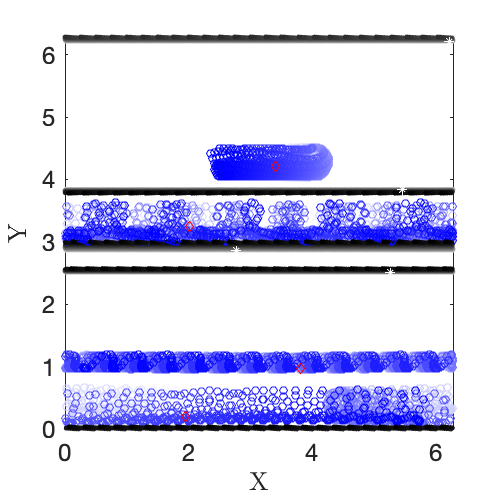

In [164]:
clf
for i=1:5:length(T)
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'.','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'o','Color',...
    [1-i/numel(T),1-i/numel(T),1],'markersize',4);
end
hold on
i=1;
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'*','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markersize',4);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'d','Color',...
    [1-i/numel(T),0,0],'markersize',4);
xlim([0 2*pi])
ylim([0 2*pi])
set(gca,'fontsize',12)
xlabel('X','interpreter','latex')
ylabel('Y','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

It looks like the vortex trajectories do not cross the wave packets. Is this true? 

In [171]:
% Next, let l0=0, increase number
tstart=cputime;
% N = 1; 
% M = 1;
L = 3;
% 
N=4;
M=10; 
init = zeros(4*M+2*N,1);
% we can choose random initial conditions with
% the additional caveat that points aren't too close
[X, Y, ~] = GetPointsRandom(N+M, 2*pi, 2*pi, 1/2);
for i=1:M
init(i,1) = X(i);
init(M+i,1) = Y(i); 

end
for i=1:N
init(4*M+i,1) = X(i+M);
init(4*M+N+i,1) = Y(i+M);
end

init(2*M+1:3*M,1) = ones(length(M),1);
init(3*M+1:4*M,1) = zeros(length(M),1);
A = 1*ones(M,1); 
G = 1e-6*( 2*rem(1:N,2) - 1);
g = 1; 
options = odeset('RelTol',1e-7,'AbsTol',1e-7);
[T,Y] = ode15s(@(t,y)WMVN_IP_2( t, y, N, M, G, A, g, L), [0:.1:1000], init, options);
tend=cputime-tstart

> In ode15s (line 655)

tend =

    2.9600



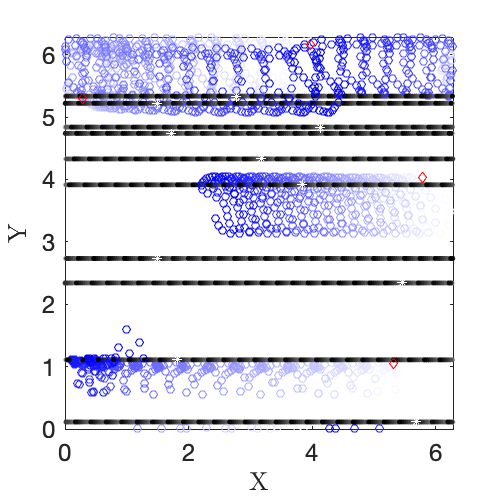

In [172]:
clf
for i=1:5:length(T)
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'.','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'o','Color',...
    [1-i/numel(T),1-i/numel(T),1],'markersize',4);
end
hold on
i=1;
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'*','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markersize',4);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'d','Color',...
    [1-i/numel(T),0,0],'markersize',4);
xlim([0 2*pi])
ylim([0 2*pi])
set(gca,'fontsize',12)
xlabel('X','interpreter','latex')
ylabel('Y','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])

As we've ramped up the total energy, it looks like the vortices interact and cross the wave trajectories. 

In [175]:
% Next, let l0=0;
tstart=cputime;
% N = 1; 
% M = 1;
L = 3;
% 
N=10;
M=10; 
init = zeros(4*M+2*N,1);
% we can choose random initial conditions with
% the additional caveat that points aren't too close
[X, Y, ~] = GetPointsRandom(N+M, 2*pi, 2*pi, 1);
for i=1:M
init(i,1) = X(i);
init(M+i,1) = Y(i); 

end
for i=1:N
init(4*M+i,1) = X(i+M);
init(4*M+N+i,1) = Y(i+M);
end

init(2*M+1:3*M,1) = ones(length(M),1);
init(3*M+1:4*M,1) = zeros(length(M),1);
A = 1e-1*ones(M,1); 
G = 1e-6*( 2*rem(1:N,2) - 1);
g = 1; 
options = odeset('RelTol',1e-7,'AbsTol',1e-7);
[T,Y] = ode15s(@(t,y)WMVN_IP_2( t, y, N, M, G, A, g, L), [0:.1:1000], init, options);
tend=cputime-tstart

> In ode15s (line 655)

tend =

   13.1900



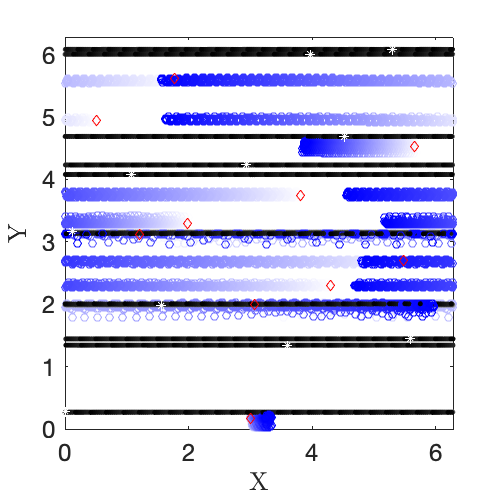

In [176]:
clf
for i=1:5:length(T)
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'.','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)]);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'o','Color',...
    [1-i/numel(T),1-i/numel(T),1],'markersize',4);
end
hold on
i=1;
plot(mod(Y(i,1:M),2*pi),mod(Y(i,M+[1:M]),2*pi),'*','Color',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markerfacecolor',...
    [1-i/numel(T),1-i/numel(T),1-i/numel(T)],'markersize',4);
hold on
plot(mod(Y(i,4*M+[1:N]),2*pi),mod(Y(i,4*M+N+[1:N]),2*pi),'d','Color',...
    [1-i/numel(T),0,0],'markersize',4);
xlim([0 2*pi])
ylim([0 2*pi])
set(gca,'fontsize',12)
xlabel('X','interpreter','latex')
ylabel('Y','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 250, 250])